# Оценка и улучшение качества модели

In [1]:
# Вплоть до настоящего момента для оценки качества модели мы разбивали наши данные на обучающий
# и тестовый нборы с помощью функции train_test_split, строили модель на обучающей выборке,
# вызвав метод fit, и оценивали ее качество на тестовом наборе, используя метод score, который
# для задач классификации вычисляет долю правильно классифицированных примеров. Вот пример:

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
# создаем синтетический набор данных
X, y = make_blobs(random_state = 0)

# разобъем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# создаем экземпляр модели и подгоняем его на обучающем наборе
logreg = LogisticRegression().fit(X_train, y_train)

# оцениваем качество модели на тестовом наборе
print(u'Правильность на тестовом наборе: {:.2f}'.format(logreg.score(X_test, y_test)))

Правильность на тестовом наборе: 0.88


## Пререкресная проверка

### Перекресная проверка в библиотеке scikit-learn

In [4]:
# Давайте оценим качество модели LogisticRegression на наборе данных iris

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [6]:
iris = load_iris()

logreg = LogisticRegression()

In [7]:
scores = cross_val_score(logreg, iris.data, iris.target)

print(u'Значения праильности перекресной проверки: {}'.format(scores))

Значения праильности перекресной проверки: [ 0.96078431  0.92156863  0.95833333]


In [9]:
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)

print(u'Значения правильности перекресной проверки:\n{}'.format(scores))

Значения правильности перекресной проверки:
[ 1.          0.96666667  0.93333333  0.9         1.        ]


In [11]:
# Наиболее распространненый способ подытожить правильность, вычисленную в ходе перекресной
# проверки, - это вычисление среднего значения.

print(u'Средняя правильность перекресной проверки: {:.2f}'.format(scores.mean()))

Средняя правильность перекресной проверки: 0.96


## Стратифицированная к-блочная перекресная проверка и другие стратегии

In [12]:
# Описанное в предыдущем разделе разбиение данных на к блоков, начиная с первой 1/к - ой части
# всего набора, не всегда является хорошей идеей. Для примера давайте посмотрим на набор
# данных iris.

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()

print(u'Метки ирисов:\n{}'.format(iris.target))

Метки ирисов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
# В стратифицированной перекресной прверке мы разбиваем данные таким образом, чтобы пропорции
# классов в каждом блоке в точности соответствовали пропорции классов в наборе данных, как это
# показано:
import mglearn

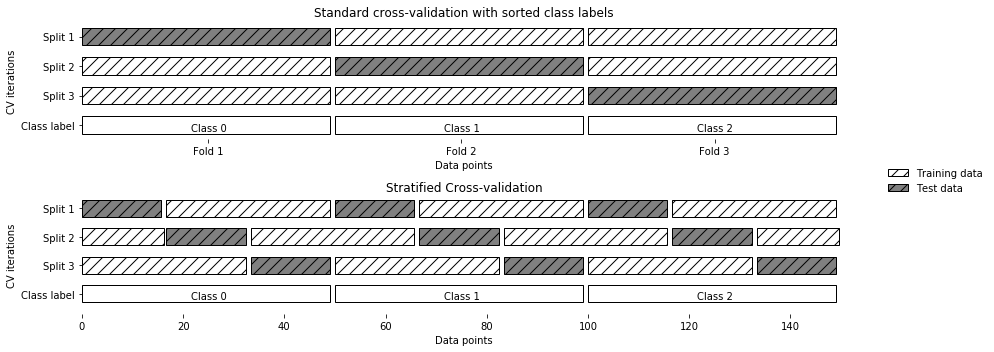

In [18]:
mglearn.plots.plot_stratified_cross_validation()

### Больше контроля над перекрестной проверкой

In [19]:
# Допустим, мы хотим применить к-блочную перекрестную проверку к классификационному набору
# данных, чтобы воспроизвести чьи-то результаты. Для этого мы должны сначало импортировать
# класс KFold из модуля model_selection и создать его экземпляр, задав нужное количество блоков

In [20]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)

In [21]:
# Затем мы можем передать объект генератора разбиений kfold в качестве параметра cv в функцию
# cross_val_score.

In [22]:
print(u'Значения правильности перекрестной проверки:\n{}'.format(cross_val_score(logreg, 
                                                                                iris.data, 
                                                                                iris.target, 
                                                                                cv = kfold)))

Значения правильности перекрестной проверки:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [23]:
# Таким образом, мы можем убедиться, что использование трехблочной (нестратифицированной) пере-
# крестной проверки для набора данных iris действительно является очень плохой идеей.

In [24]:
kfold = KFold(n_splits = 3)

print(u'Значения правильности перекрестной проверки:\n{}'.format(cross_val_score(logreg, 
                                                                                iris.data, 
                                                                                iris.target, 
                                                                                cv = kfold)))

Значения правильности перекрестной проверки:
[ 0.  0.  0.]


In [25]:
# Нарушим порядок сортировки примеров, определяемый их метками.

kfold = KFold(n_splits = 3, shuffle = True, random_state = 0)

print(u'Значения правильности перекрестной проверки:\n{}'.format(cross_val_score(logreg, 
                                                                                iris.data, 
                                                                                iris.target, 
                                                                                cv = kfold)))

Значения правильности перекрестной проверки:
[ 0.9   0.96  0.96]


### Перекрестная проверка с исключением по одному

In [30]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)

print(u'Количество итераций cv: {}'.format(len(scores)))
print(u'Средняя правильность: {:.2f}'.format(scores.mean()))

Количество итераций cv: 150
Средняя правильность: 0.95


### Перекрестная проверка со случайными перестановками при разбиении

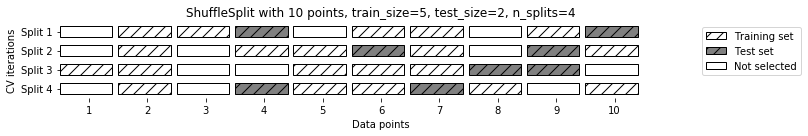

In [31]:
mglearn.plots.plot_shuffle_split()

In [32]:
# Программный код, приведенный ниже, 10 раз разбивает данные на 50%-ный обучающий набор и
# 50%-ый тестовый набор.

from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size = 0.5, train_size = 0.5, n_splits = 10)

scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)

print(u'Значения правильности перекрестной проверки:\n{}'.format(scores))

Значения правильности перекрестной проверки:
[ 0.96        0.96        0.96        0.93333333  0.82666667  0.92        0.96
  0.94666667  0.93333333  0.90666667]


### Перекрестная проверка с использованием групп

In [33]:
from sklearn.model_selection import GroupKFold
# создаем синтетический набор данных
X, y = make_blobs(n_samples = 12, random_state = 0)
# передположим, что первые три примера относятся к одной и той же группе, затем - следующие
# четыре и т.д.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv = GroupKFold(n_splits = 3))

print(u'Значения правильности перекрестной проверки:\n{}'.format(scores))

Значения правильности перекрестной проверки:
[ 0.75        0.8         0.66666667]
